쇼핑몰에서 기모 팬츠를 50% 세일한다는 알림을 받은 후, 날씨 변화에 따른 데이터의 추이가 궁금해져 데이터를 비교해보기로 하였습니다.
- 네이버 데이터 랩의 데이터로 1년 동안의 검색 량 데이터를 받아서 분석하였습니다.
- 따뜻한 날씨를 나타내는 '원피스'와 '기모 팬츠'의 검색 량을 비교하기 위해 두 가지 데이터를 추출하였습니다.

In [1]:
import pandas as pd 

In [2]:
data = pd.read_excel("./datalab.xlsx")
data.head()

,url,http://datalab.naver.com/keyword/trendResult.naver?hashKey=N_9d2d5b9c4f7ad3a9aad0f94ee7a6a2a5,Unnamed: 2,Unnamed: 3
0,주제,통검,NaN,NaN
1,범위,합계,NaN,NaN
2,기간,일간 : 2019-03-10 ~ 2020-03-10,NaN,NaN
3,성별,여성,NaN,NaN
4,연령대,전체,NaN,NaN


In [3]:
# 상위 6개의 Data 는 NaN 이 있어서 삭제

data = pd.read_excel("./datalab.xlsx", header=6)
data.head()

,날짜,기모팬츠,날짜.1,원피스
0,2019-03-10,0.34454,2019-03-10,68.81569
1,2019-03-11,0.33286,2019-03-11,55.99743
2,2019-03-12,0.43214,2019-03-12,51.23218
3,2019-03-13,0.39710,2019-03-13,49.32258
4,2019-03-14,0.40294,2019-03-14,48.59261


In [4]:
# 한 개의 날짜 데이터만 남기기

data = data.drop('날짜.1', axis=1)
data

,날짜,기모팬츠,원피스
0,2019-03-10,0.34454,68.81569
1,2019-03-11,0.33286,55.99743
2,2019-03-12,0.43214,51.23218
3,2019-03-13,0.39710,49.32258
4,2019-03-14,0.40294,48.59261
...,...,...,...
362,2020-03-06,0.50221,42.76454
363,2020-03-07,0.39126,50.01751
364,2020-03-08,0.44966,56.53468
365,2020-03-09,0.44382,50.54309


In [5]:
# 날짜 데이터를 datetime으로 형변환

data['날짜'] = pd.to_datetime(data['날짜'])

data.dtypes

날짜      datetime64[ns]
기모팬츠           float64
원피스            float64
dtype: object

In [6]:
# 정리한 데이터를 엑셀 파일로 내보내기

data.to_excel('./new_datalab.xlsx')

이제 그래프를 그려보자

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', family = "NanumGothic")

c:\users\eunnyoung\appdata\local\programs\python\python36\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


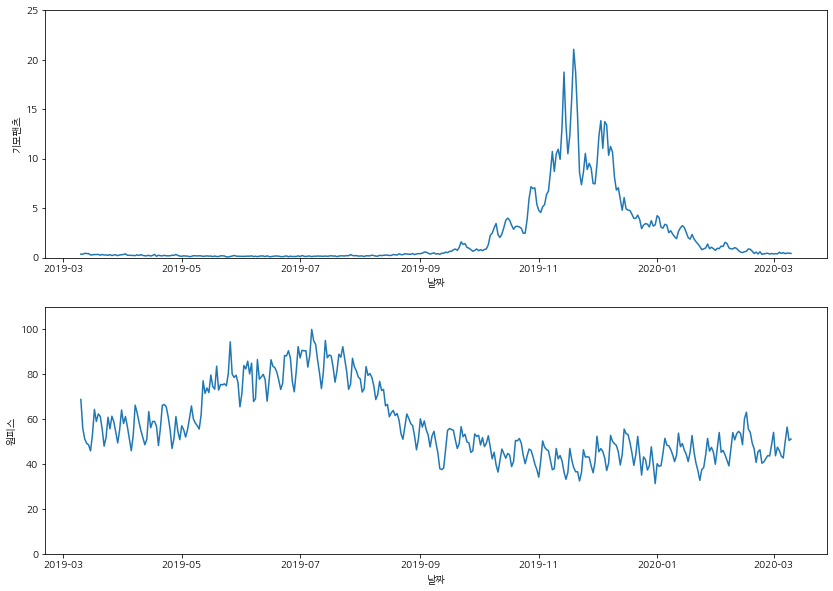

In [8]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)
fig.set_size_inches([14, 10])

# y 축의 범위 지정
ax1.set_ylim(0,25)
ax2.set_ylim(0,110)

sns.lineplot(data = data, x = '날짜', y = '기모팬츠', ax = ax1)
sns.lineplot(data = data, x = '날짜', y = '원피스', ax = ax2)

비교하기 위해 하나로 통합

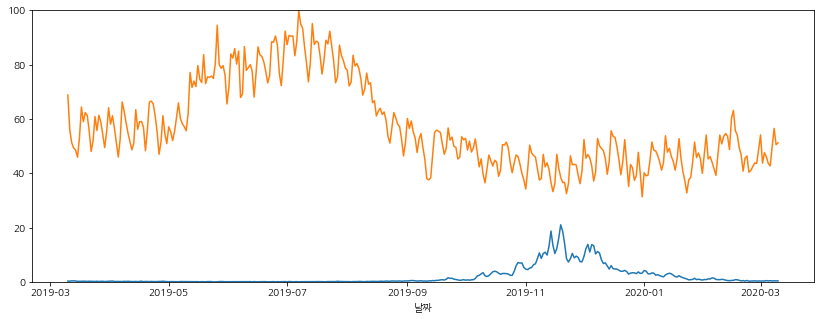

In [17]:
fig, ax1 = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches([14, 5])

# y 축의 범위 지정
ax1.set_ylim(0,100)

sns.lineplot(data = data, x = '날짜', y = '기모팬츠', ax = ax1)
sns.lineplot(data = data, x = '날짜', y = '원피스', ax = ax1)

ax1.set_ylabel('')
plt.show()

seaborn.distplot 를 사용하려 했지만. 아직 이해도가 낮아서 seaborn.lineplot 을 사용하였다.

함수에 대해 좀 더 공부하자

seaborn.lineplot
  - http://seaborn.pydata.org/generated/seaborn.lineplot.html
  
seaborn.distplot
  - https://seaborn.pydata.org/generated/seaborn.distplot.html

그럼 기모팬츠가 가장 많이 검색된 날은 언제 일까

In [10]:
기모팬츠_최대_조회수_열 = data.sort_values(by=['기모팬츠'], ascending=False)

print(기모팬츠_최대_조회수_열.head(1))
pd.DataFrame(기모팬츠_최대_조회수_열.head(1)['날짜'])

            날짜    기모팬츠       원피스
254 2019-11-19  21.064  38.53655


,날짜
254,2019-11-19


원피스, 기모팬츠의 검색 량 흐름을 좀 더 보기 쉽게 그려보자

'pandas 변동' 으로 검색
다음 URL 참조
  - http://jonathansoma.com/lede/foundations-2018/pandas/rolling-averages-in-pandas/

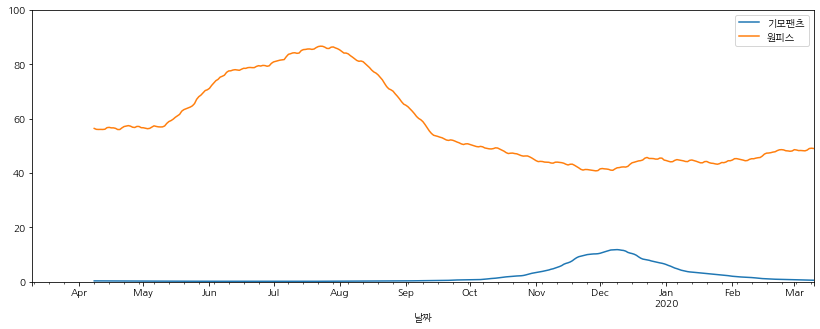

In [25]:
fig, ax1 = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches([14, 5])

data.rolling(14, on='날짜').mean().plot(x='날짜', ylim=(0, 100), ax = ax1)

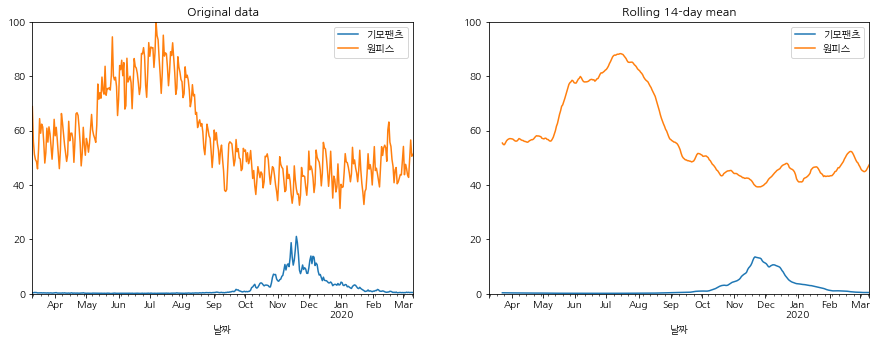

In [26]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

ax1.set_title("Original data")
data.plot(x='날짜', ylim=(0, 100), ax=ax1)

ax2.set_title("Rolling 14-day mean")
data.rolling(14, on='날짜').mean().plot(x='날짜', ylim=(0, 100), ax=ax2)

### 결론

그래프를 보니 원피스는 3월 이후에 검색 량이 점점 늘었으나, 기모팬츠는 3월 이후부터 검색 량이 없었기 때문에 3월을 기점으로 세일에 돌입했다는 것을 알 수 있었습니다.

5월부터는 원피스의 검색 량이 매우 늘어나는 것을 그래프로 볼 수 있었습니다. 따라서, 5월부터 봄옷을 찾는 사람들이 매우 많은 것을 알 수 있었습니다.

In [12]:
# 14일 전부터 평균 값
data.rolling(14).mean().sort_values(by=['기모팬츠'], ascending=False).head(5)

,기모팬츠,원피스
256,13.529460,39.797938
257,13.379295,39.441713
258,13.283356,39.309901
259,13.148625,39.269023
255,13.124849,40.162506


In [13]:
# 기모팬츠가 가장 변동이 심한  // 날짜는 2019-11-21 로 알수 있음
data.iloc[256] # 날짜

날짜      2019-11-21 00:00:00
기모팬츠                14.2724
원피스                 36.6795
Name: 256, dtype: object

In [14]:
data.rolling(14).mean().sort_values(by=['원피스'], ascending=False).head(5)

,기모팬츠,원피스
127,0.137230,88.297121
126,0.135144,88.292116
128,0.133476,88.145288
124,0.134727,88.107329
125,0.136396,88.096484


In [15]:
data.iloc[127]

날짜      2019-07-15 00:00:00
기모팬츠                0.11679
원피스                  87.392
Name: 127, dtype: object